In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_half_hour=pd.read_csv('PHX.csv')
df_half_hour.isna().sum()

valid        0
tmpf      3045
dwpf      3122
relh      3188
drct     20315
sknt      1408
alti     11353
mslp     11608
vsby       361
dtype: int64

In [3]:
filter_df=df_half_hour
filter_df

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby
0,7/1/1945 6:00,77.0,52.0,41.72,158.0,5.2,29.75,1005.4,15.0
1,7/1/1945 7:00,75.0,50.0,41.41,68.0,1.7,29.75,1005.4,15.0
2,7/1/1945 8:00,75.0,60.0,59.59,0.0,0.0,29.75,1005.4,15.0
3,7/1/1945 9:00,70.0,52.0,52.80,68.0,4.5,29.73,1004.7,15.0
4,7/1/1945 10:00,69.0,51.0,52.66,135.0,1.0,29.73,1004.7,15.0
...,...,...,...,...,...,...,...,...,...
712550,4/19/2025 20:51,71.0,34.0,25.58,200.0,7.0,30.04,1016.2,10.0
712551,4/19/2025 21:51,71.0,31.0,22.67,NaN,4.0,30.02,1015.6,10.0
712552,4/19/2025 21:53,71.0,30.0,21.77,350.0,9.0,30.02,NaN,10.0
712553,4/19/2025 22:51,74.0,31.0,20.48,260.0,6.0,30.00,1015.0,10.0


In [4]:
# Ensure the 'valid' column is in datetime format
filter_df['valid'] = pd.to_datetime(filter_df['valid'])

# Add a 'date' column for easier grouping
filter_df['date'] = filter_df['valid'].dt.date

# Find rows with the maximum temperature for each day
daily_max_temp = filter_df.loc[filter_df.groupby('date')['tmpf'].idxmax()].reset_index(drop=True)

# Inspect the result
daily_max_temp.drop(columns=['valid'],inplace=True)
daily_max_temp


,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,date
0,110.0,53.0,15.54,293.0,8.7,29.74,1005.1,40.0,1945-07-01
1,110.0,52.0,14.98,270.0,9.7,29.72,1004.4,40.0,1945-07-02
2,107.0,56.0,18.93,270.0,7.0,29.75,1005.4,35.0,1945-07-03
3,107.0,48.0,14.09,225.0,7.0,29.77,1006.1,30.0,1945-07-04
4,109.0,47.0,12.80,293.0,8.0,29.77,1006.1,45.0,1945-07-05
...,...,...,...,...,...,...,...,...,...
29143,92.0,46.0,20.58,290.0,10.0,29.77,1006.4,10.0,2025-04-15
29144,93.0,43.0,17.80,260.0,9.0,29.68,1003.3,10.0,2025-04-16
29145,91.0,42.0,18.23,270.0,9.0,29.67,1003.1,10.0,2025-04-17
29146,79.0,37.0,22.05,220.0,16.0,29.79,1007.4,10.0,2025-04-18


In [5]:
daily_max_temp['temp_c'] = (daily_max_temp['tmpf'] - 32) * 5/9

# Drop the old column if needed
daily_max_temp.drop(columns=['tmpf'], inplace=True)

daily_max_temp

,dwpf,relh,drct,sknt,alti,mslp,vsby,date,temp_c
0,53.0,15.54,293.0,8.7,29.74,1005.1,40.0,1945-07-01,43.333333
1,52.0,14.98,270.0,9.7,29.72,1004.4,40.0,1945-07-02,43.333333
2,56.0,18.93,270.0,7.0,29.75,1005.4,35.0,1945-07-03,41.666667
3,48.0,14.09,225.0,7.0,29.77,1006.1,30.0,1945-07-04,41.666667
4,47.0,12.80,293.0,8.0,29.77,1006.1,45.0,1945-07-05,42.777778
...,...,...,...,...,...,...,...,...,...
29143,46.0,20.58,290.0,10.0,29.77,1006.4,10.0,2025-04-15,33.333333
29144,43.0,17.80,260.0,9.0,29.68,1003.3,10.0,2025-04-16,33.888889
29145,42.0,18.23,270.0,9.0,29.67,1003.1,10.0,2025-04-17,32.777778
29146,37.0,22.05,220.0,16.0,29.79,1007.4,10.0,2025-04-18,26.111111


In [6]:
percentile_90 = np.percentile(daily_max_temp['temp_c'], 90)
print(f"90th Percentile of max_temp_c: {percentile_90}")
daily_max_temp

90th Percentile of max_temp_c: 41.666666666666664


,dwpf,relh,drct,sknt,alti,mslp,vsby,date,temp_c
0,53.0,15.54,293.0,8.7,29.74,1005.1,40.0,1945-07-01,43.333333
1,52.0,14.98,270.0,9.7,29.72,1004.4,40.0,1945-07-02,43.333333
2,56.0,18.93,270.0,7.0,29.75,1005.4,35.0,1945-07-03,41.666667
3,48.0,14.09,225.0,7.0,29.77,1006.1,30.0,1945-07-04,41.666667
4,47.0,12.80,293.0,8.0,29.77,1006.1,45.0,1945-07-05,42.777778
...,...,...,...,...,...,...,...,...,...
29143,46.0,20.58,290.0,10.0,29.77,1006.4,10.0,2025-04-15,33.333333
29144,43.0,17.80,260.0,9.0,29.68,1003.3,10.0,2025-04-16,33.888889
29145,42.0,18.23,270.0,9.0,29.67,1003.1,10.0,2025-04-17,32.777778
29146,37.0,22.05,220.0,16.0,29.79,1007.4,10.0,2025-04-18,26.111111


In [7]:
daily_max_temp.isna().sum()

dwpf         6
relh         7
drct      1385
sknt        68
alti       327
mslp       259
vsby        18
date         0
temp_c       0
dtype: int64

In [8]:
daily_max_temp = daily_max_temp.ffill() 
daily_max_temp.isna().sum()

dwpf      0
relh      0
drct      0
sknt      0
alti      0
mslp      0
vsby      0
date      0
temp_c    0
dtype: int64

In [12]:
daily_max_temp['date'] = pd.to_datetime(daily_max_temp['date'])

daily_max_temp = daily_max_temp[(daily_max_temp['date'] >= pd.to_datetime('2010-01-01')) & (daily_max_temp['date'] <= pd.to_datetime('2024-10-21'))]

daily_max_temp

,dwpf,relh,drct,sknt,alti,mslp,vsby,date,temp_c
23560,10.0,10.30,0.0,0.0,30.12,1019.3,10.0,2010-01-01,20.000000
23561,17.0,13.10,0.0,3.0,30.01,1015.3,10.0,2010-01-02,21.111111
23562,20.0,14.29,290.0,3.0,30.05,1016.8,10.0,2010-01-03,21.666667
23563,17.0,11.81,80.0,8.0,30.07,1017.2,10.0,2010-01-04,22.777778
23564,21.0,14.51,0.0,0.0,30.02,1015.8,10.0,2010-01-05,22.222222
...,...,...,...,...,...,...,...,...,...
28963,32.0,11.19,300.0,14.0,29.73,1006.4,10.0,2024-10-17,34.444444
28964,42.0,20.68,300.0,5.0,29.66,1002.7,10.0,2024-10-18,30.555556
28965,35.0,24.87,200.0,4.0,30.03,1015.8,10.0,2024-10-19,22.777778
28966,32.0,16.92,310.0,6.0,30.07,1016.9,10.0,2024-10-20,27.222222


In [13]:
df=daily_max_temp

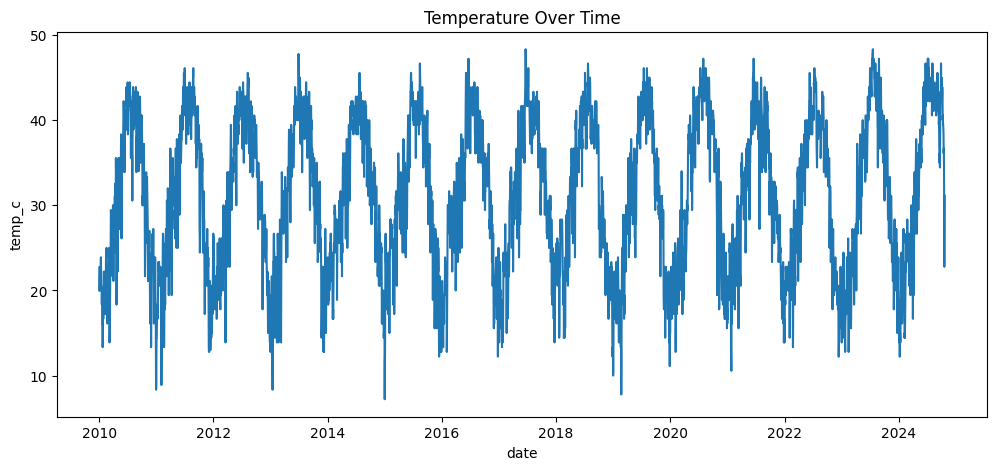

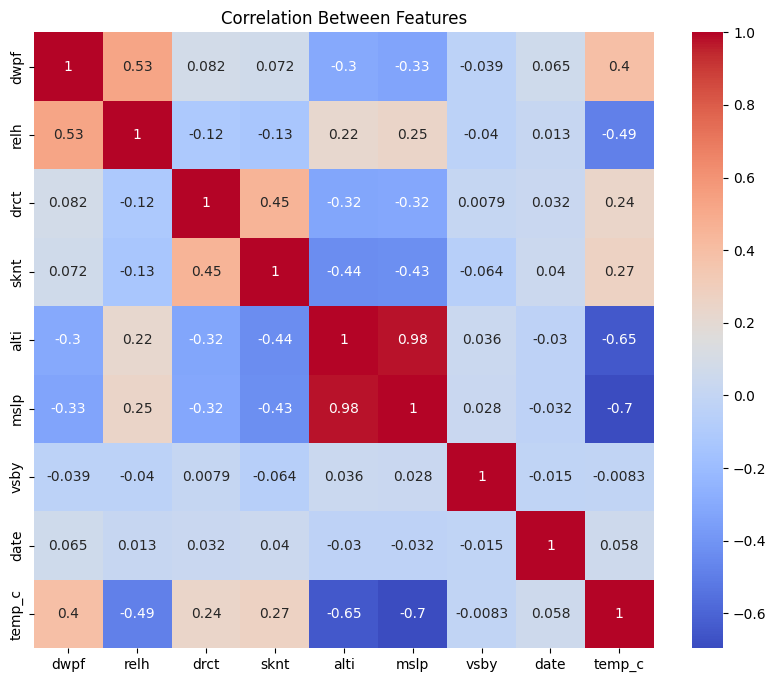

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Temperature trend
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='temp_c', data=df)
plt.title("Temperature Over Time")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


In [15]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Create useful time columns
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour

C:\Users\muham\AppData\Local\Temp\ipykernel_4020\3355275362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\muham\AppData\Local\Temp\ipykernel_4020\3355275362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
C:\Users\muham\AppData\Local\Temp\ipykernel_4020\3355275362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


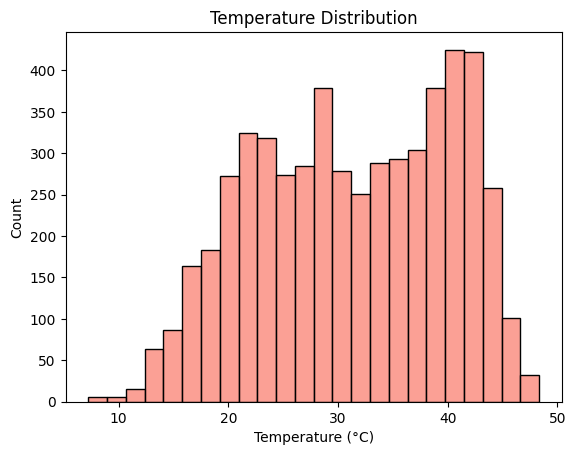

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame and 'temp_c' is the temperature column
sns.histplot(data=df, x='temp_c', kde=False, color='salmon', edgecolor='black')

plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()


C:\Users\muham\AppData\Local\Temp\ipykernel_4020\2633976979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='temp_c', data=monthly_temp, palette='Oranges')


Text(0, 0.5, 'Temperature (°C)')

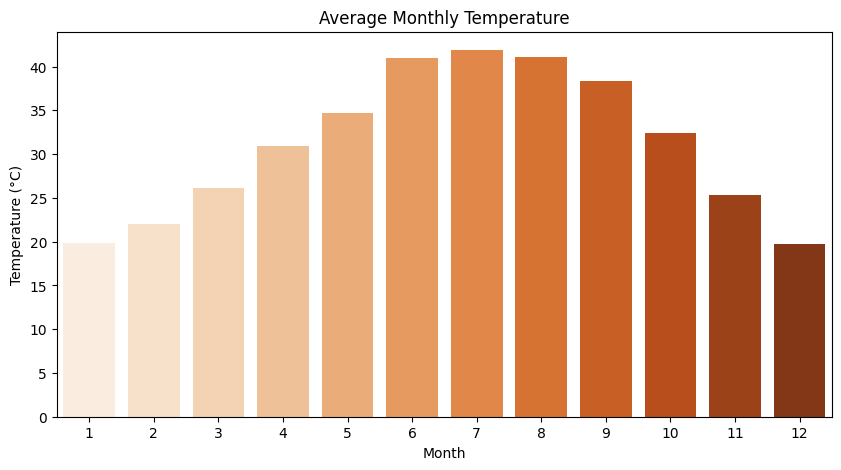

In [17]:
monthly_temp = df.groupby('month')['temp_c'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='month', y='temp_c', data=monthly_temp, palette='Oranges')
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")


Text(0.5, 1.0, 'Average Maximum Temperature (°C) Month')

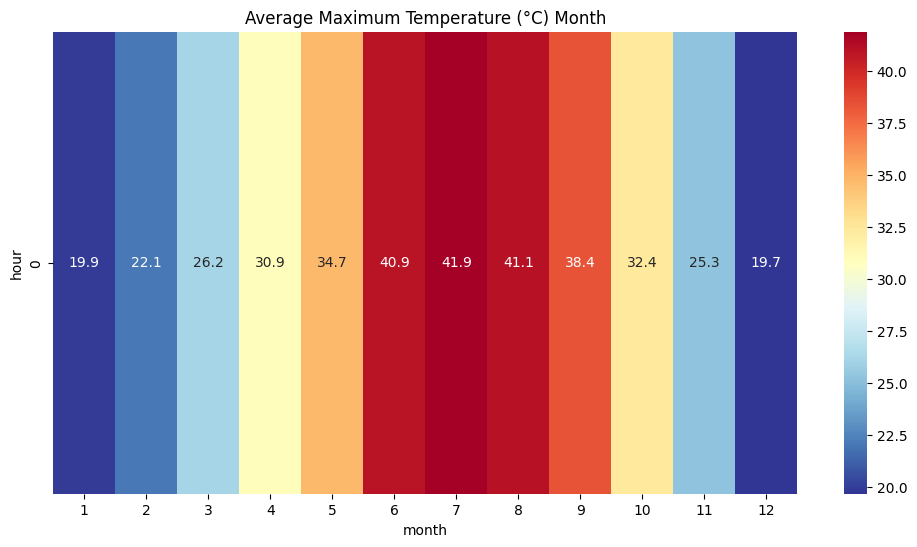

In [20]:
pivot_table = df.pivot_table(index='hour', columns='month', values='temp_c', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="RdYlBu_r", annot=True, fmt=".1f")
plt.title("Average Maximum Temperature (°C) Month")

Number of days with large temperature change (> 5°C): 172


C:\Users\muham\AppData\Local\Temp\ipykernel_4020\1881992037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp_change'] = df['temp_c'].diff()


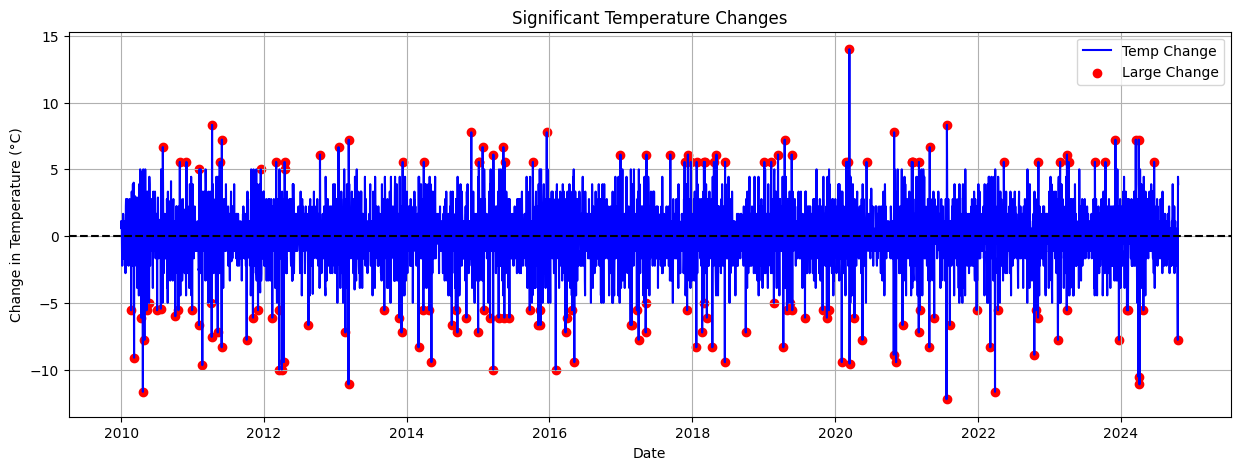

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily temperature change
df['temp_change'] = df['temp_c'].diff()

# Define threshold, e.g., >5°C change
threshold = 5

# Filter days with large absolute temperature change
large_change = df[np.abs(df['temp_change']) > threshold]

# Print number of large change days
print("Number of days with large temperature change (> 5°C):", len(large_change))

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['temp_change'], label="Temp Change", color='blue')
plt.scatter(large_change['date'], large_change['temp_change'], color='red', label='Large Change')
plt.axhline(0, color='black', linestyle='--')
plt.title("Significant Temperature Changes")
plt.xlabel("Date")
plt.ylabel("Change in Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
